In [1]:
rm(list=ls())

In [2]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,576461,30.8,1250441,66.8,1077903,57.6
Vcells,1078573,8.3,8388608,64.0,1820941,13.9


In [3]:
# install.packages("tidyverse") # sagemaker has
library(tidyverse)

# install.packages("cluster") # sagemaker has
library(cluster)

# install.packages("tsfeatures") # sagemaker doesn't have
library(tsfeatures)

# install.packages("mclust") # sagemaker doesn't have
library(mclust)

# install.packages("Rcatch22") # sagemaker doesn't have
library(Rcatch22)

# install.packages("tseries") # sagemaker doesn't have
library(tseries)

# install.packages("factoextra") # sagemaker doesn't have
library(factoextra)

# install.packages("forecast")
library(forecast)

# install.packages("dtwclust")
library(dtwclust)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Package 'mclust' version 5.4.9
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following object is masked from ‘package:purrr’:

    map


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Loading required package: proxy


Attaching package: ‘proxy’


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix


Loading required packag

# Read In and Subset Data

In [4]:
# Read in all files from the Data/Processed directory
england_fnames <- list.files("Data/Processed/Highways_England/", pattern="*.csv", full.names=TRUE)
england_df_list <- lapply(england_fnames, read_csv)

portland_fnames <- list.files("Data/Processed/Portland/", pattern="*.csv", full.names=TRUE)
portland_df_list <- lapply(portland_fnames, read_csv)

utah_fnames <- list.files("Data/Processed/Utah/", pattern="*.csv", full.names=TRUE)
utah_df_list <- lapply(utah_fnames, read_csv)

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ───────────────────────────────────────────────────────


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or s

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ───────────────────────────────────────────────────────


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or s

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ───────────────────────────────────────────────────────


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or s

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [5]:
england_df_list <- lapply(england_df_list, function(x) x %>% arrange(timestamp))
portland_df_list <- lapply(portland_df_list, function(x) x %>% arrange(timestamp))
utah_df_list <- lapply(utah_df_list, function(x) x %>% arrange(timestamp))    

In [6]:
total_df_list <- append(append(england_df_list, portland_df_list), utah_df_list)

In [7]:
set.seed(54321)
starting_points <- sample(1:((96*365)-(96*12*7)), 
                          length(total_df_list), 
                          replace=FALSE)
ending_points <- starting_points + (96*7*12) - 1

In [8]:
total_df_list <- lapply(total_df_list, function(x) x %>% mutate(rn = row_number()))

In [9]:
total_df_list_samples <- lapply(1:length(total_df_list), 
                                function(x) total_df_list[[x]] %>% 
                                    filter(rn >= starting_points[x]) %>%
                                    filter(rn <= ending_points[x]))

In [10]:
total_df_list_samples <- lapply(total_df_list_samples, 
                                function(x) x %>% mutate(rn = row_number()) %>%
                                    mutate(train_val_test = ifelse(rn <= (96*7*8), 
                                                                   "train", 
                                                                   ifelse(rn <= (96*7*10), 
                                                                          "val", 
                                                                          "test")))
                                
                               )

In [11]:
train_val_samples <- lapply(total_df_list_samples, function(x) x %>% filter(train_val_test != "test"))

In [12]:
train_samples <- lapply(total_df_list_samples, function(x) x %>% filter(train_val_test == "train"))

In [13]:
test_samples <- lapply(total_df_list_samples, function(x) x %>% filter(train_val_test == "test"))

In [14]:
train_val_samples_ts <- lapply(train_val_samples, 
                               function(x) msts(x$total_volume, seasonal.periods=c(24*4, 24*4*7)))

In [15]:
train_samples_ts <- lapply(train_samples, 
                           function(x) msts(x$total_volume, seasonal.periods=c(24*4, 24*4*7)))

In [16]:
test_samples_ts <- lapply(test_samples,
                          function(x) msts(x$total_volume, seasonal.periods=c(24*4, 24*4*7)))

# Random Cluster Assignments

In [17]:
total_clust <- 1:length(train_val_samples_ts)

In [18]:
set.seed(54321)
clust1 <- sample(total_clust, length(train_val_samples_ts)/4, replace=FALSE)
set.seed(54321)
clust2 <- sample(total_clust[-clust1], length(train_val_samples_ts)/4, replace=FALSE)
set.seed(54321)
clust3 <- sample(total_clust[-c(clust1,clust2)], length(train_val_samples_ts)/4, replace=FALSE)
set.seed(54321)
clust4 <- sample(total_clust[-c(clust1,clust2,clust3)], length(train_val_samples_ts)/4, replace=FALSE)

In [19]:
clust1

[1] 41 49 39 58 46 51 62 26 15 37 69 11 67 53 30 13 16 72 74

In [20]:
clust2

[1] 59 54 64 65 14 50 25 56 19 60 32 73 63 47 76 61 12 57 36

In [21]:
clust3

[1] 18 31 22 40 70 66  5 55 23 68 21 17 52 71 20 45 43  7 29

In [22]:
clust4

[1] 34 24 44  2 33  9  6 28 27  3 75 35 42  8 38  1  4 10 48

In [23]:
random_clust_assignments <- c()
for (idx in total_clust){
    if (idx %in% clust1){
        assign <- 1
    }
    
    else if (idx %in% clust2){
        assign <- 2
    }
    
    else if (idx %in% clust3){
        assign <- 3
    }

    else if (idx %in% clust4){
        assign <- 4
    }
    random_clust_assignments <- c(random_clust_assignments, assign)
}

In [24]:
random_clust_assignments

[1] 4 4 4 4 3 4 3 4 4 4 1 2 1 2 1 1 3 3 2 3 3 3 3 4 2 1 4 4 3 1 3 2 4 4 4 2 1 4
[39] 1 3 1 4 3 4 3 1 2 4 1 2 1 3 1 2 3 2 2 1 2 2 2 1 2 2 2 3 1 3 1 3 3 1 2 1 4 2

In [25]:
random_clust_df <- data.frame(ts_index=total_clust, random_clust_assign=random_clust_assignments)

In [26]:
write.csv(random_clust_df, "random_clustering_assign.csv", row.names=FALSE)

# Catch22 Based Feature Computation

In [27]:
train_catch22_feat <- lapply(lapply(train_samples_ts, function(x) catch22_all(x)), 
                             function(x) x %>% 
                                 pivot_wider(names_from=names, values_from=values))

In [28]:
ts_means_var <- tsfeatures(train_samples_ts, c("mean","var"), scale=FALSE, na.rm=TRUE)

In [29]:
train_catch22_feat_df <- cbind(do.call("rbind", train_catch22_feat), 
                               ts_means_var)

In [30]:
head(train_catch22_feat_df)

,DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,SB_BinaryStats_mean_longstretch1,SB_TransitionMatrix_3ac_sumdiagcov,PD_PeriodicityWang_th0_01,⋯,DN_OutlierInclude_n_001_mdrmd,SP_Summaries_welch_rect_area_5_1,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr,mean,var
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.8241913,-1.074272,13,48,0.7280227,0.0004981483,0.7266977,56,0.005869537,95,⋯,-0.022693452,0.9873130,19,1.478522,0.4081633,0.3469388,0.06596117,0.2855363,240.2472,32091.83
2,-1.0418788,-1.261398,15,48,0.7337985,0.0041718968,0.7942326,61,0.001731474,95,⋯,0.002046131,0.9784537,13,1.504746,0.4489796,0.3265306,0.06596117,0.2974666,191.9170,16619.88
3,-0.8426436,-1.071948,16,48,0.7523444,-0.0013779902,0.7281860,59,0.016181035,95,⋯,-0.018973214,0.9842704,15,1.515349,0.4081633,0.3469388,0.06519418,0.2538126,202.3339,23231.19
4,-0.8638443,-1.082631,14,48,0.7816261,0.0027961909,0.6716279,56,0.005071623,95,⋯,0.019717262,0.9871433,20,1.431369,0.4285714,0.3469388,0.06596117,0.2678449,406.6468,93360.19
5,-0.9568506,-1.136406,18,48,0.8454878,0.0006537947,0.6874419,54,0.002624842,95,⋯,0.007068452,0.9923321,18,1.409810,0.4285714,0.3265306,0.06519418,0.2070834,451.2814,105424.69
6,-1.0182364,-1.220609,17,48,0.8269746,0.0042333027,0.7337674,61,0.001824410,95,⋯,0.017671131,0.9882751,23,1.439875,0.4285714,0.3469388,0.06519418,0.2261327,447.7576,89521.39


In [31]:
summary(train_catch22_feat_df)

 DN_HistogramMode_5 DN_HistogramMode_10   CO_f1ecac     CO_FirstMin_ac 
 Min.   :-1.2725    Min.   :-1.5028     Min.   : 9.00   Min.   : 3.00  
 1st Qu.:-1.0196    1st Qu.:-1.2072     1st Qu.:14.00   1st Qu.:48.00  
 Median :-0.8929    Median :-1.0880     Median :16.00   Median :48.00  
 Mean   :-0.6522    Mean   :-0.8882     Mean   :15.49   Mean   :46.51  
 3rd Qu.:-0.6680    3rd Qu.:-0.9851     3rd Qu.:17.00   3rd Qu.:48.00  
 Max.   : 1.3039    Max.   : 1.0329     Max.   :25.00   Max.   :49.00  
 CO_HistogramAMI_even_2_5 CO_trev_1_num       MD_hrv_classic_pnn40
 Min.   :0.0000001        Min.   :-0.022159   Min.   :0.4350      
 1st Qu.:0.6754312        1st Qu.:-0.000719   1st Qu.:0.7119      
 Median :0.7368211        Median : 0.001790   Median :0.7493      
 Mean   :0.7088488        Mean   : 0.014978   Mean   :0.7540      
 3rd Qu.:0.8099636        3rd Qu.: 0.004790   3rd Qu.:0.7960      
 Max.   :0.8900489        Max.   : 1.000498   Max.   :0.9321      
 SB_BinaryStats_mean_longst

In [32]:
# Eliminate feature with 0 variance
train_catch22_feat_df <- train_catch22_feat_df %>% select(-PD_PeriodicityWang_th0_01)

In [33]:
# Scale features to unit interval per Catch22 paper
train_catch22_feat_df_scaled <- train_catch22_feat_df

In [34]:
for (n in 1:ncol(train_catch22_feat_df_scaled)){
    min_n <- min(train_catch22_feat_df_scaled[,n])
    max_n <- max(train_catch22_feat_df_scaled[,n])
    train_catch22_feat_df_scaled[,n] <- (train_catch22_feat_df_scaled[,n] - min_n)/(max_n - min_n)
}

In [35]:
summary(train_catch22_feat_df_scaled)

 DN_HistogramMode_5 DN_HistogramMode_10   CO_f1ecac      CO_FirstMin_ac  
 Min.   :0.00000    Min.   :0.0000      Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.09817    1st Qu.:0.1166      1st Qu.:0.3125   1st Qu.:0.9783  
 Median :0.14736    Median :0.1636      Median :0.4375   Median :0.9783  
 Mean   :0.24076    Mean   :0.2424      Mean   :0.4054   Mean   :0.9459  
 3rd Qu.:0.23466    3rd Qu.:0.2042      3rd Qu.:0.5000   3rd Qu.:0.9783  
 Max.   :1.00000    Max.   :1.0000      Max.   :1.0000   Max.   :1.0000  
 CO_HistogramAMI_even_2_5 CO_trev_1_num     MD_hrv_classic_pnn40
 Min.   :0.0000           Min.   :0.00000   Min.   :0.0000      
 1st Qu.:0.7589           1st Qu.:0.02097   1st Qu.:0.5571      
 Median :0.8278           Median :0.02342   Median :0.6323      
 Mean   :0.7964           Mean   :0.03631   Mean   :0.6417      
 3rd Qu.:0.9100           3rd Qu.:0.02635   3rd Qu.:0.7261      
 Max.   :1.0000           Max.   :1.00000   Max.   :1.0000      
 SB_BinaryStats_mean_longst

## K-Means Clustering with Catch22 Features and Mean and Var

Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”


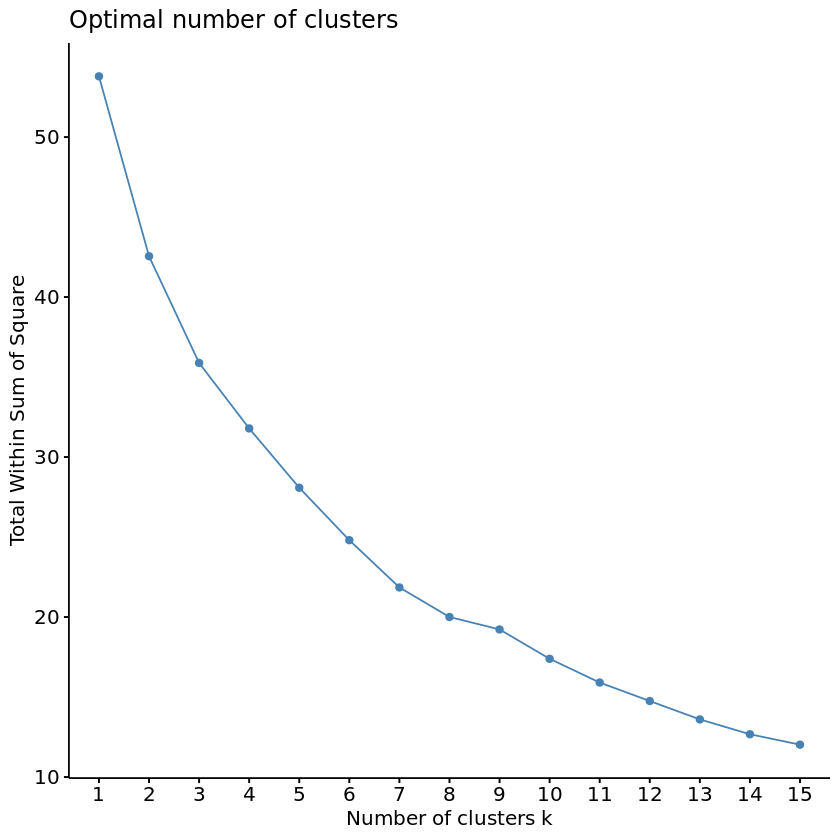

In [36]:
# Eblow Method based on WSS
set.seed(54321)
fviz_nbclust(train_catch22_feat_df_scaled, 
             kmeans, 
             method = "wss", 
             k.max=15, 
             iter.max=1000, 
             nstart=100, 
             algorithm="Lloyd")
# No clear best number, maybe 12? which is very high

Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”


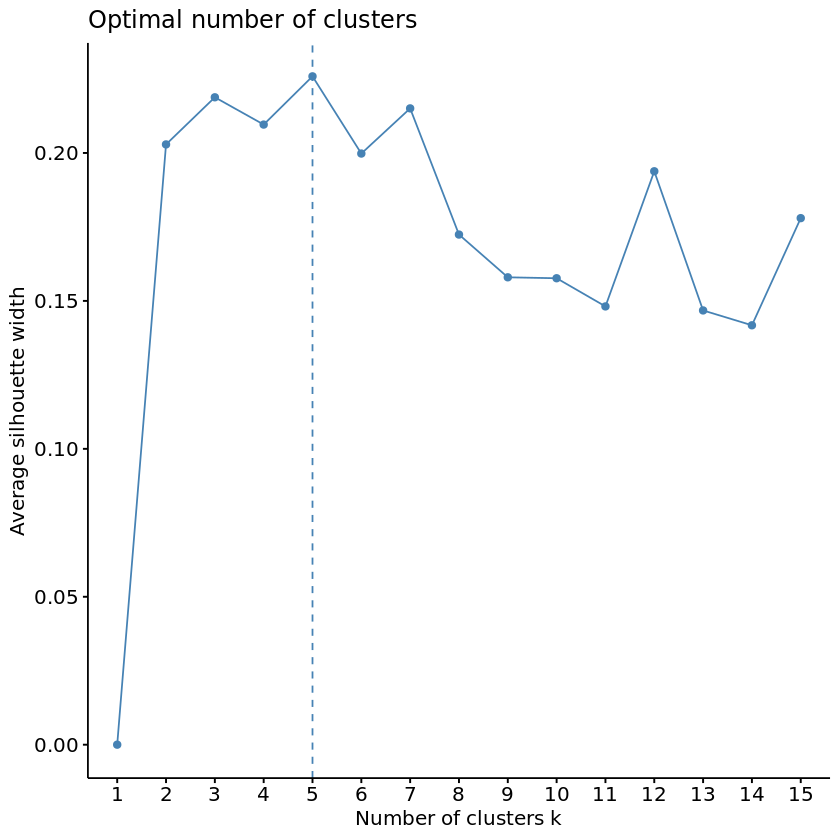

In [37]:
# Let's try the silhouette method instead
set.seed(54321)
fviz_nbclust(train_catch22_feat_df_scaled, 
             kmeans, 
             method="silhouette", 
             k.max=15, 
             iter.max=10000, 
             nstart=500, 
             algorithm="Lloyd")
# Much clearer indication of 4-7 being optimal numbers, with 5 being the best

In [38]:
k1 <- 3
k2 <- 4
k3 <- 5

set.seed(54321)
kmeans_clust1 <- kmeans(train_catch22_feat_df_scaled, k1, iter.max=10000, nstart=500, algorithm="Lloyd") 
set.seed(54321)
kmeans_clust2 <- kmeans(train_catch22_feat_df_scaled, k2, iter.max=10000, nstart=500, algorithm="Lloyd") 
set.seed(54321)
kmeans_clust3 <- kmeans(train_catch22_feat_df_scaled, k3, iter.max=10000, nstart=500, algorithm="Lloyd") 


In [39]:
D <- daisy(train_catch22_feat_df_scaled)

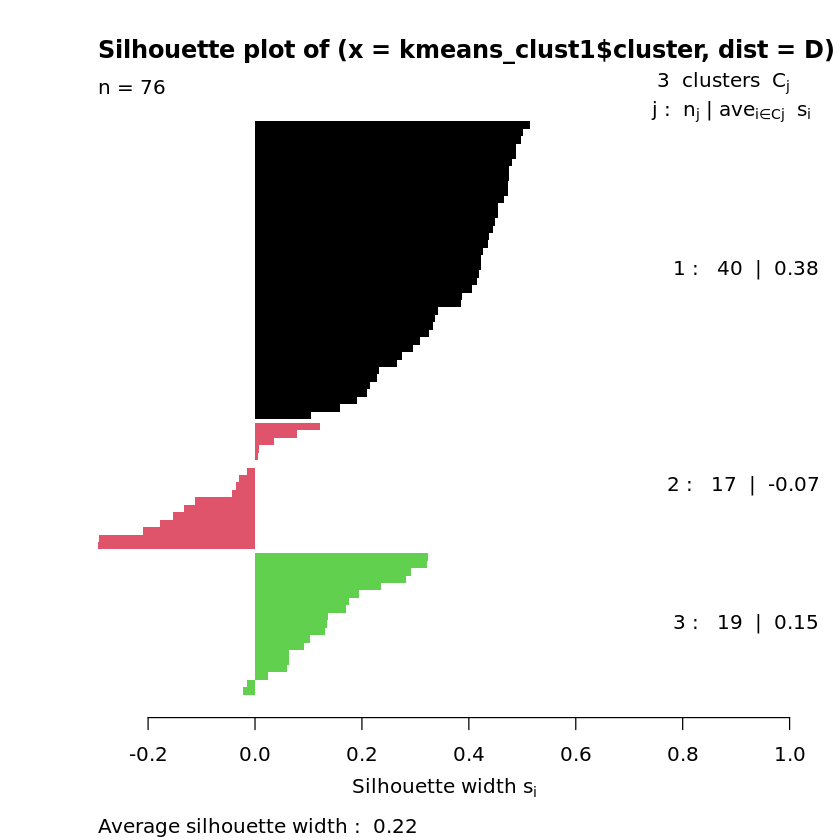

In [40]:
plot(silhouette(kmeans_clust1$cluster, D), col=1:k1, border=NA)

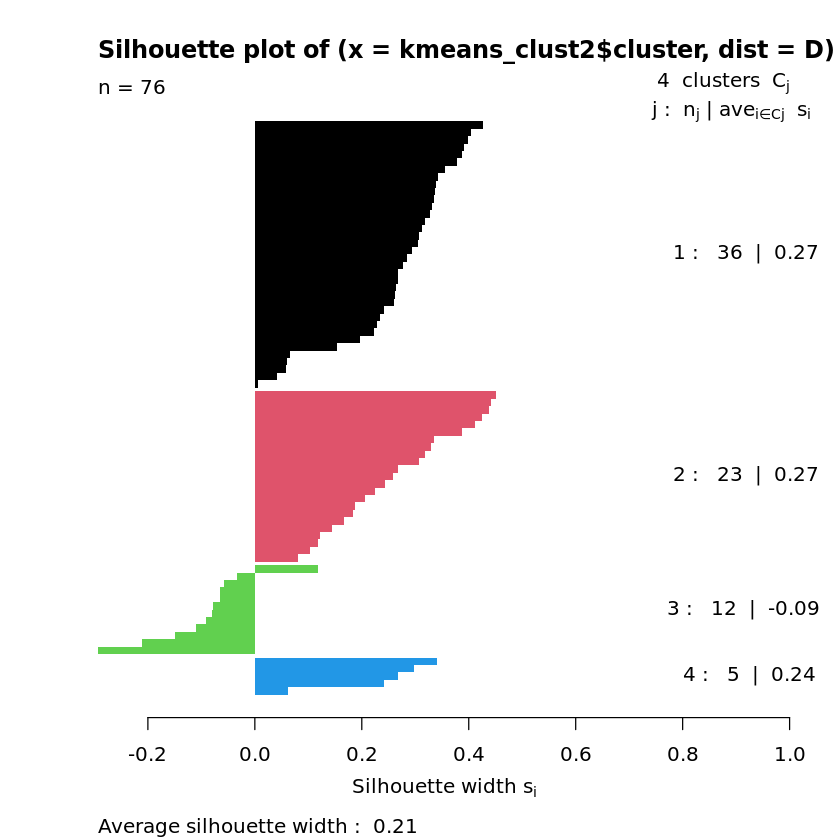

In [41]:
plot(silhouette(kmeans_clust2$cluster, D), col=1:k2, border=NA)

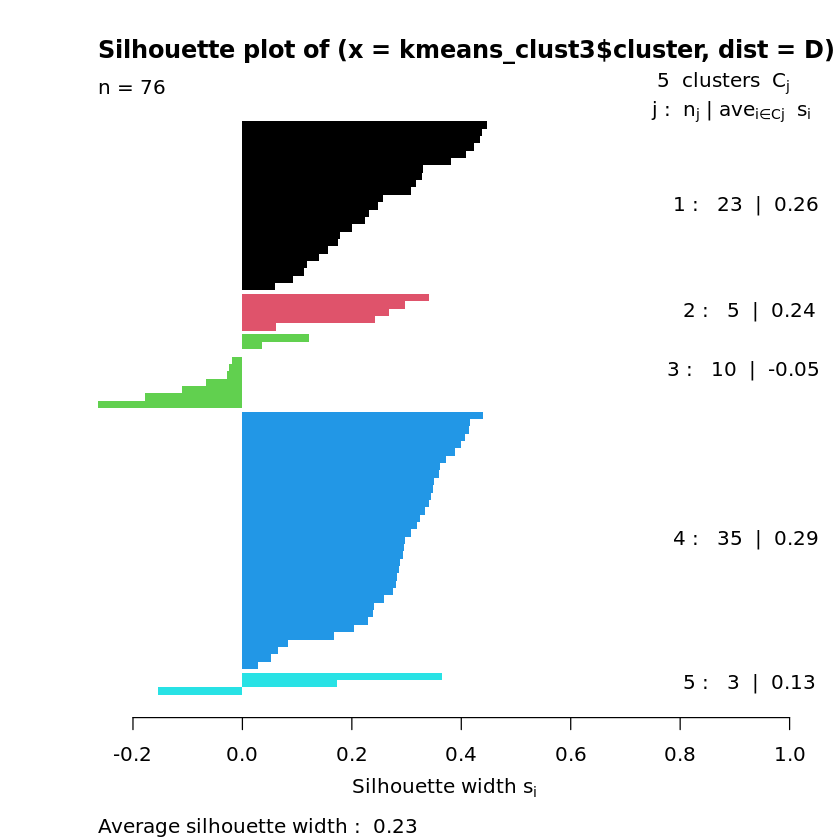

In [42]:
plot(silhouette(kmeans_clust3$cluster, D), col=1:k3, border=NA)

4 seems like the best choice

In [43]:
set.seed(54321)
kfinal <- 4
kmeans_final <- kmeans(train_catch22_feat_df_scaled, kfinal, iter.max=10000, nstart=500, algorithm="Lloyd") 

In [44]:
saveRDS(kmeans_final, file="kmeans_catch22_mean_var.RData")

In [45]:
kmeans_final$cluster

[1] 2 1 1 2 2 2 1 1 1 1 3 2 1 1 2 2 1 1 3 4 4 1 2 2 2 2 4 4 2 1 4 2 2 2 2 2 2 2
[39] 1 1 1 3 3 1 3 1 1 1 3 1 1 1 3 3 1 3 1 1 1 2 2 3 3 2 2 1 1 1 3 1 1 1 1 1 1 1

In [46]:
kmeans_clust_df <- data.frame(ts_index=1:length(kmeans_final$cluster), 
                              kmeans_catch22_clust_assign=kmeans_final$cluster)

In [47]:
head(kmeans_clust_df)

,ts_index,kmeans_catch22_clust_assign
,<int>,<int>
1,1,2
2,2,1
3,3,1
4,4,2
5,5,2
6,6,2


In [48]:
write.csv(kmeans_clust_df, "kmeans_catch22_mean_var_clustering_assign.csv", row.names=FALSE)

## Mixture Model Clustering with Catch22 Features and Mean and Var

In [49]:
gmm_clust <- Mclust(train_catch22_feat_df_scaled, G=1:12)

In [50]:
summary(gmm_clust)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 2 components: 

 log-likelihood  n  df      BIC      ICL
       2814.145 76 577 3129.457 3129.457

Clustering table:
 1  2 
57 19 

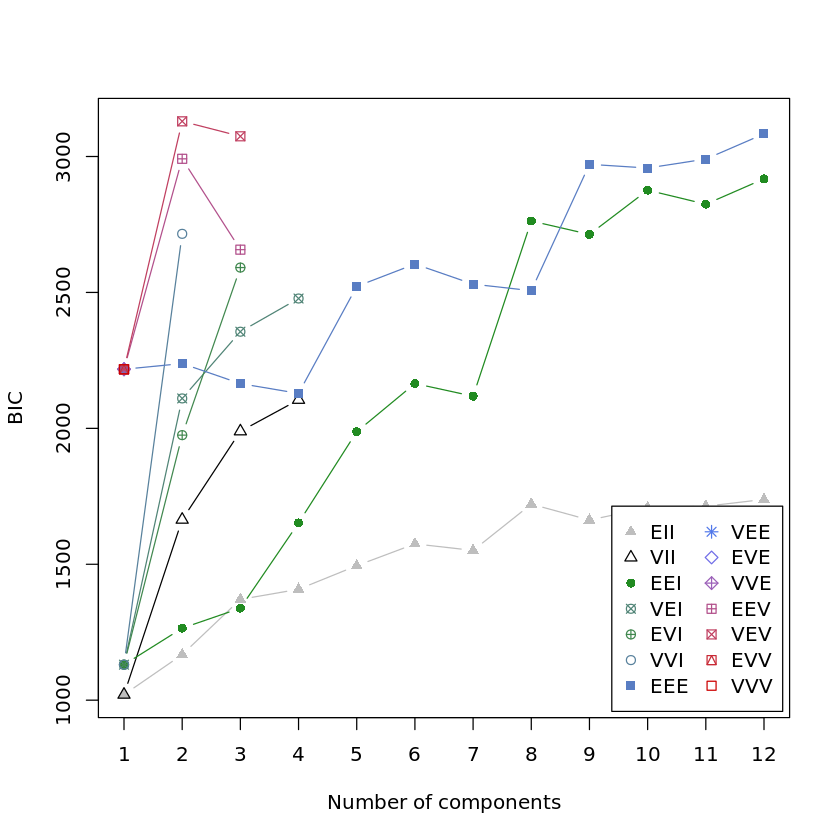

In [51]:
plot(gmm_clust, what = c("BIC"))

In [52]:
gmm_clust$modelName

[1] "VEV"

In [53]:
gmm_clust$G

[1] 2

In [54]:
gmm_clust$classification

[1] 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1
[39] 1 1 1 2 2 1 2 1 1 1 2 1 1 2 2 1 1 2 1 1 1 1 1 2 2 1 1 2 1 2 2 1 1 1 1 1 1 1

In [55]:
gmm_clust$uncertainty

[1] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 [6] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[11] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[16] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[21] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[26] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[31] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[36] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[41] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[46] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[51] 4.206762e-06 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[56] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[61] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[66] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[71] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[76] 0.000000e+00

In [56]:
saveRDS(gmm_clust, file="gmm_catch22_mean_var.RData")

In [57]:
gmm_clust_df <- data.frame(ts_index=1:length(gmm_clust$classification), 
                           gmm_catch22_clust_assign=gmm_clust$classification,
                           uncertainty=gmm_clust$uncertainty
                          )

In [58]:
head(gmm_clust_df)

,ts_index,gmm_catch22_clust_assign,uncertainty
,<int>,<dbl>,<dbl>
1,1,1,0
2,2,1,0
3,3,1,0
4,4,1,0
5,5,1,0
6,6,1,0


In [59]:
write.csv(gmm_clust_df, "gmm_catch22_mean_var_clustering_assign.csv", row.names=FALSE)

## KMeans Clustering with Catch22 Features and no Mean or Var

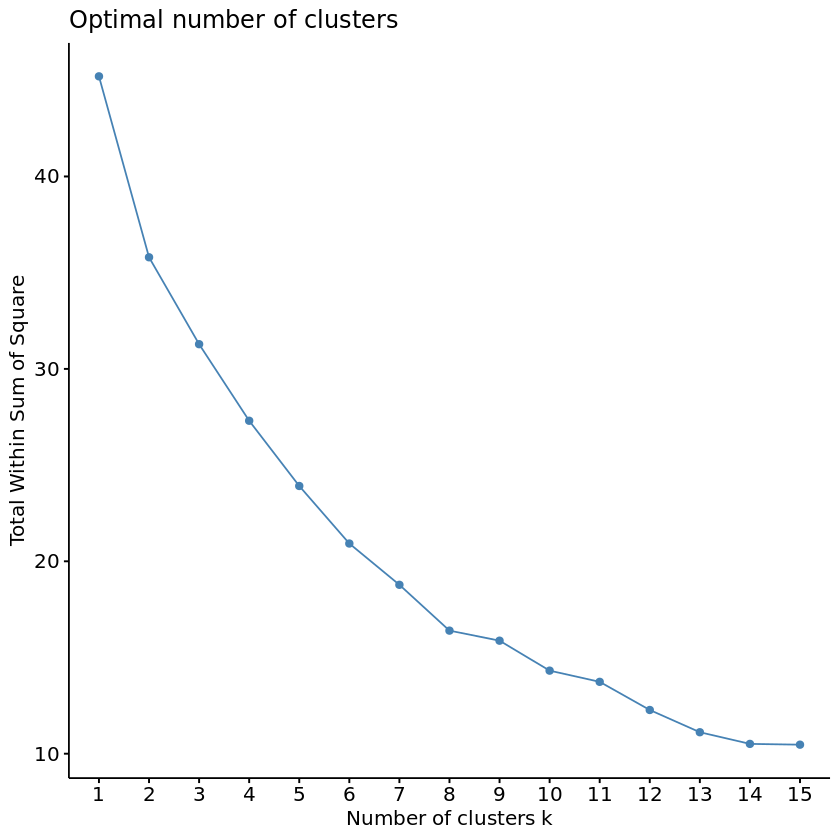

In [60]:
# Eblow Method based on WSS
set.seed(54321)
fviz_nbclust(train_catch22_feat_df_scaled %>% select(-c(mean, var)), 
             kmeans, 
             method = "wss", 
             k.max=15, 
             iter.max=1000, 
             nstart=100, 
             algorithm="Lloyd")
# No clear best number, maybe 12? which is very high

Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”


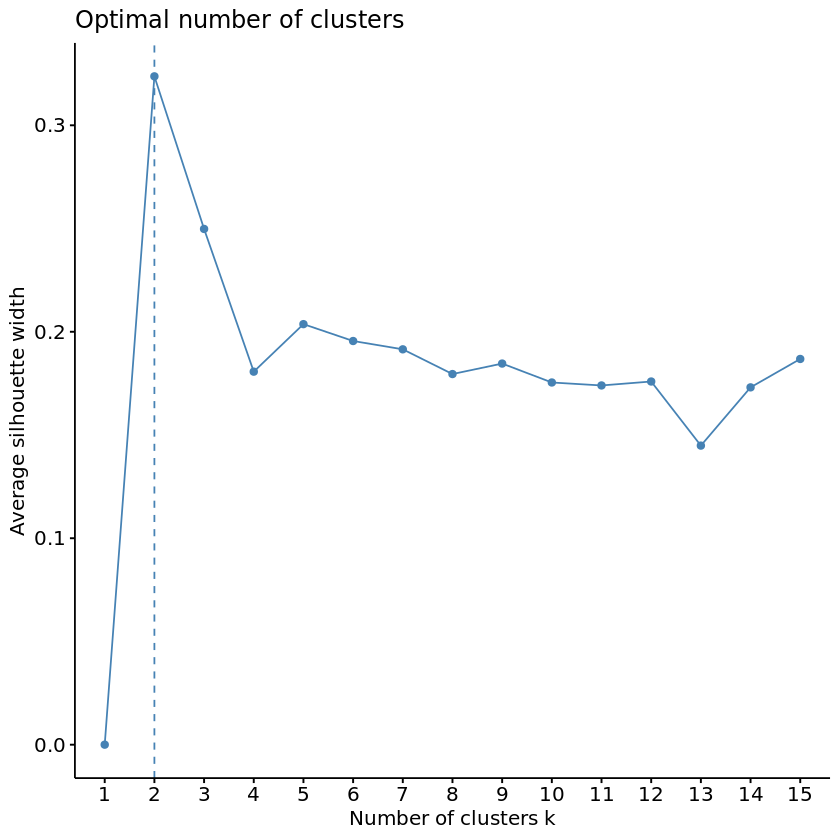

In [61]:
# Let's try the silhouette method instead
set.seed(54321)
fviz_nbclust(train_catch22_feat_df_scaled %>% select(-c(mean, var)),  
             kmeans, 
             method="silhouette", 
             k.max=15, 
             iter.max=10000, 
             nstart=500, 
             algorithm="Lloyd")
# Much clearer indication of 4-7 being optimal numbers, with 5 being the best

In [62]:
k1 <- 3
k2 <- 4
k3 <- 5
k4 <- 6
k5 <- 7

set.seed(54321)
kmeans_clust1 <- kmeans(train_catch22_feat_df_scaled %>% select(-c(mean, var)), 
                        k1, iter.max=10000, nstart=500, algorithm="Lloyd") 
set.seed(54321)
kmeans_clust2 <- kmeans(train_catch22_feat_df_scaled %>% select(-c(mean, var)), 
                        k2, iter.max=10000, nstart=500, algorithm="Lloyd") 
set.seed(54321)
kmeans_clust3 <- kmeans(train_catch22_feat_df_scaled %>% select(-c(mean, var)), 
                        k3, iter.max=10000, nstart=500, algorithm="Lloyd") 

set.seed(54321)
kmeans_clust4 <- kmeans(train_catch22_feat_df_scaled %>% select(-c(mean, var)), 
                        k4, iter.max=10000, nstart=500, algorithm="Lloyd") 

set.seed(54321)
kmeans_clust5 <- kmeans(train_catch22_feat_df_scaled %>% select(-c(mean, var)), 
                        k5, iter.max=10000, nstart=500, algorithm="Lloyd") 

In [63]:
D <- daisy(train_catch22_feat_df_scaled %>% select(-c(mean, var)))

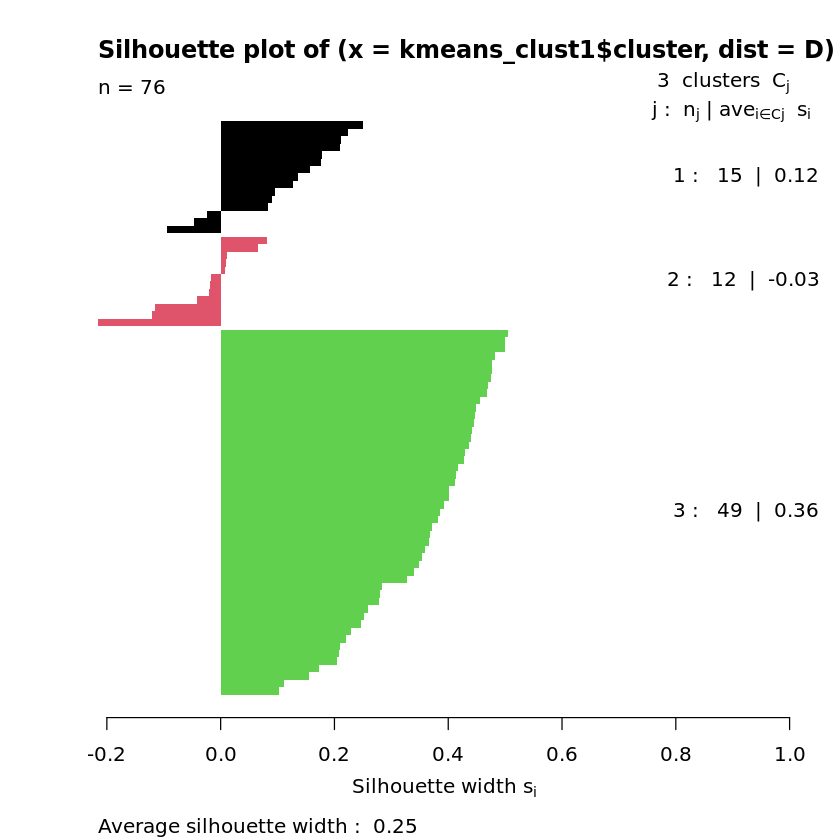

In [64]:
plot(silhouette(kmeans_clust1$cluster, D), col=1:k1, border=NA)

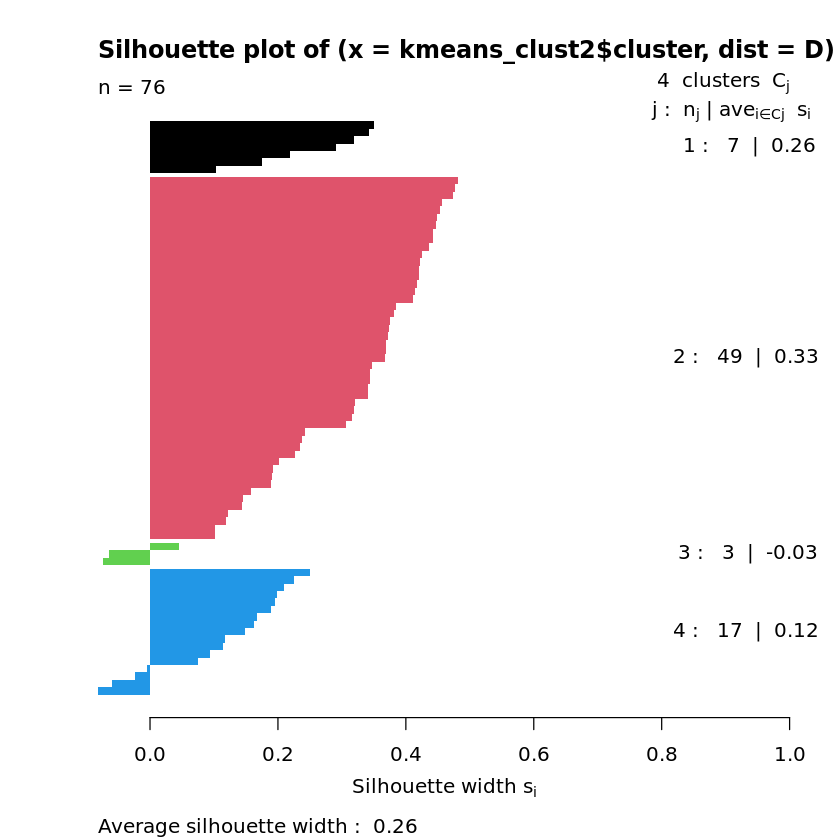

In [65]:
plot(silhouette(kmeans_clust2$cluster, D), col=1:k2, border=NA)

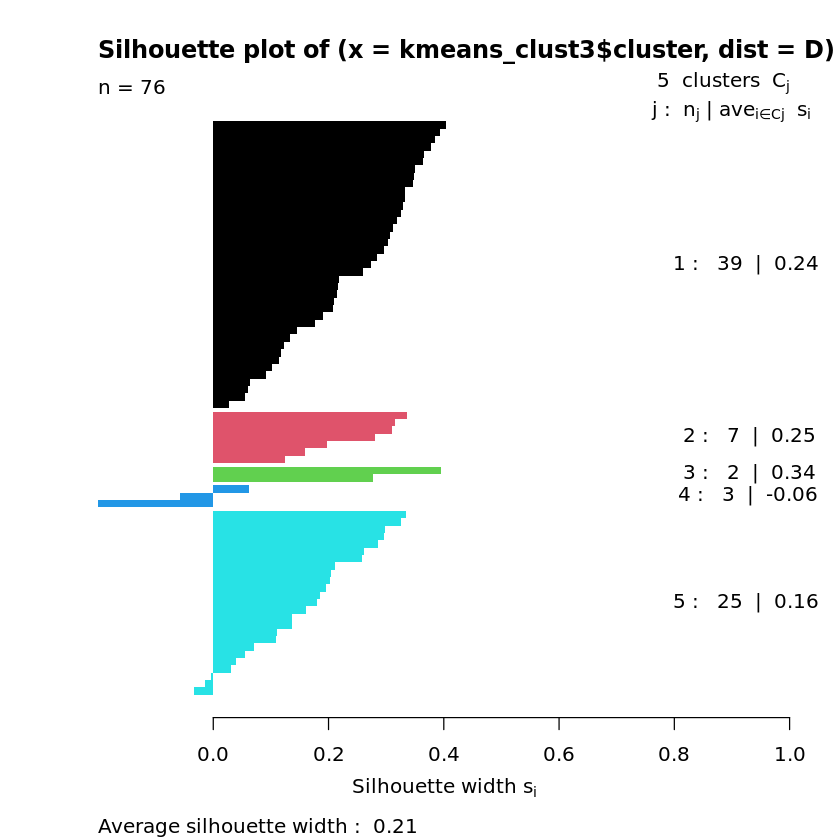

In [66]:
plot(silhouette(kmeans_clust3$cluster, D), col=1:k3, border=NA)

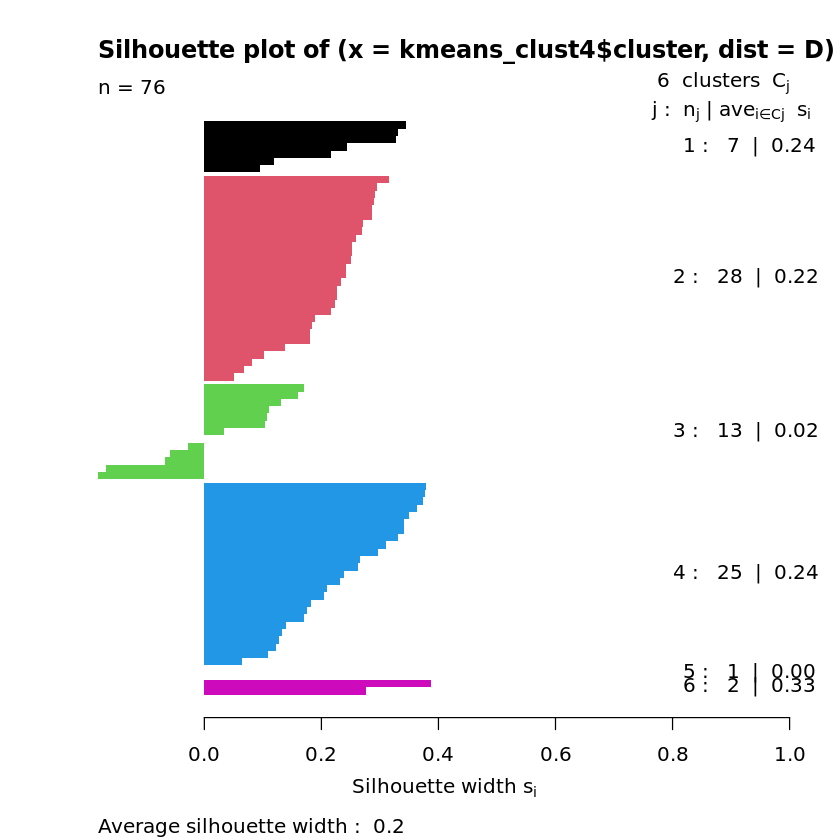

In [67]:
plot(silhouette(kmeans_clust4$cluster, D), col=1:k4, border=NA)

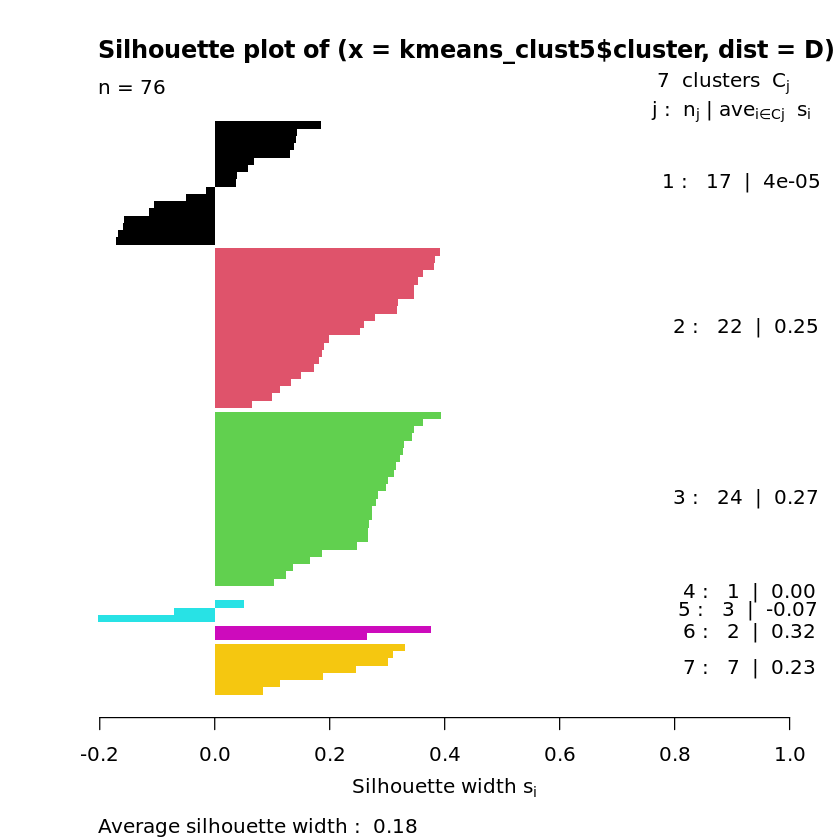

In [68]:
plot(silhouette(kmeans_clust5$cluster, D), col=1:k5, border=NA)

Best options are 5 or 6, we will go with 6

In [69]:
set.seed(54321)
kfinal <- 6
kmeans_final <- kmeans(train_catch22_feat_df_scaled %>% select(-c(mean, var)),
                       kfinal, iter.max=10000, nstart=500, algorithm="Lloyd") 

In [70]:
saveRDS(kmeans_final, "kmeans_catch22.RData")

In [71]:
kmeans_final$cluster

[1] 4 2 2 4 4 2 2 2 4 2 1 4 2 2 4 4 4 2 6 1 1 2 4 4 4 4 1 4 2 4 1 4 2 4 2 4 4 4
[39] 3 2 2 3 1 2 1 3 2 2 3 3 3 2 5 3 3 3 2 2 2 4 4 3 3 4 4 3 3 4 6 2 2 2 2 2 2 4

In [72]:
kmeans_clust_df <- data.frame(ts_index=1:length(kmeans_final$cluster), 
                              kmeans_catch22_clust_assign=kmeans_final$cluster)

In [73]:
head(kmeans_clust_df)

,ts_index,kmeans_catch22_clust_assign
,<int>,<int>
1,1,4
2,2,2
3,3,2
4,4,4
5,5,4
6,6,2


In [74]:
write.csv(kmeans_clust_df, "kmeans_catch22_clustering_assign.csv", row.names=FALSE)

## Mixture Model Clustering with Catch22 Features without Mean and Var

In [75]:
gmm_clust <- Mclust(train_catch22_feat_df_scaled %>% select(-c(mean, var)), 
                    G=1:12)

In [76]:
summary(gmm_clust)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVE (ellipsoidal, equal orientation) model with 2 components: 

 log-likelihood  n  df      BIC     ICL
       2124.272 76 295 2970.977 2970.97

Clustering table:
 1  2 
54 22 

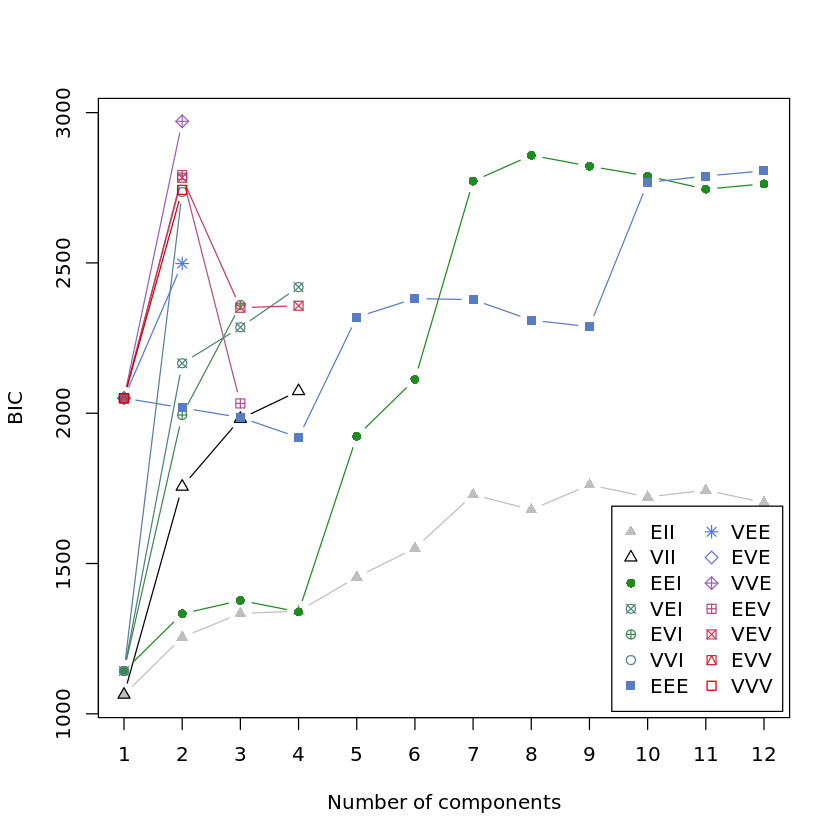

In [77]:
plot(gmm_clust, what = c("BIC"))

In [78]:
gmm_clust$modelName

[1] "VVE"

In [79]:
gmm_clust$G

[1] 2

In [80]:
gmm_clust$classification

[1] 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 2 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1
[39] 1 1 1 2 2 1 2 1 1 1 2 1 1 2 2 1 1 2 1 1 1 1 2 2 2 1 1 2 1 2 2 1 1 1 1 1 1 1

In [81]:
gmm_clust$uncertainty

[1] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 9.052934e-04
 [6] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[11] 0.000000e+00 9.972237e-04 0.000000e+00 0.000000e+00 0.000000e+00
[16] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[21] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[26] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[31] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[36] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[41] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[46] 0.000000e+00 0.000000e+00 0.000000e+00 2.017320e-11 0.000000e+00
[51] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[56] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[61] 1.480057e-03 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[66] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[71] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[76] 0.000000e+00

In [82]:
saveRDS(gmm_clust, file="gmm_catch22.RData")

In [83]:
gmm_clust_df <- data.frame(ts_index=1:length(gmm_clust$classification), 
                           gmm_catch22_clust_assign=gmm_clust$classification,
                           uncertainty=gmm_clust$uncertainty
                          )

In [84]:
head(gmm_clust_df)

,ts_index,gmm_catch22_clust_assign,uncertainty
,<int>,<dbl>,<dbl>
1,1,1,0.0000000000
2,2,1,0.0000000000
3,3,1,0.0000000000
4,4,1,0.0000000000
5,5,2,0.0009052934
6,6,1,0.0000000000


In [85]:
write.csv(gmm_clust_df, "gmm_catch22_clustering_assign.csv", row.names=FALSE)

# TSFeatures Computation  

In [86]:
ts_feat_list <- cbind(tsfeatures(train_samples_ts, c("acf_features","entropy","lumpiness","flat_spots","crossing_points")),
                      tsfeatures(train_samples_ts,"stl_features", s.window='periodic', robust=TRUE),
                      tsfeatures(train_samples_ts, "max_kl_shift", width=96),
                      tsfeatures(train_samples_ts, c("mean","var"), scale=FALSE, na.rm=TRUE),
                      tsfeatures(train_samples_ts, c("max_level_shift","max_var_shift"), trim=TRUE))

In [87]:
head(ts_feat_list)

,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,seas_acf1,entropy,lumpiness,flat_spots,⋯,trough1,trough2,max_kl_shift,time_kl_shift,mean,var,max_level_shift,time_level_shift,max_var_shift,time_var_shift
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.9786684,6.071303,0.09955463,0.22923628,-0.6079489,0.3943768,0.8540087,0.6782436,0.001128858,41,⋯,11,608,1.4080970,1766,240.2472,32091.83,0.10812766,3088,0.12025850,3
2,0.9701665,6.374971,-0.09903519,0.07000481,-0.6268296,0.4218419,0.8425866,0.6536231,0.001933725,29,⋯,1,500,2.9916584,3784,191.9170,16619.88,0.11827825,3646,0.08897745,1667
3,0.9787455,7.026316,-0.05976278,0.09157036,-0.6038060,0.3817030,0.8231161,0.6275385,0.001104251,39,⋯,35,284,3.4488780,2883,202.3339,23231.19,0.09653200,2383,0.10727084,1711
4,0.9801411,6.558471,0.04096415,0.16818353,-0.6292484,0.4389144,0.8525582,0.6499062,0.001198741,39,⋯,56,173,0.6510470,2699,406.6468,93360.19,0.08453674,3792,0.08133954,2305
5,0.9878141,7.655158,0.01152159,0.24774998,-0.6334273,0.4354897,0.8565159,0.5140402,0.003639964,39,⋯,30,437,0.4119915,2296,451.2814,105424.69,0.08792653,3672,0.06667866,3576
6,0.9834137,7.483912,-0.06527288,0.13048659,-0.6088053,0.3851671,0.8532984,0.5680445,0.006877932,40,⋯,64,89,2.5680112,4645,447.7576,89521.39,0.08795412,3494,0.12744722,3861


In [88]:
ts_feat_list <- ts_feat_list%>% select(-c(nperiods, seasonal_period1, seasonal_period2))

In [89]:
# Scale features to unit interval per Catch22 paper
ts_feat_list_df_scaled <- ts_feat_list

In [90]:
for (n in 1:ncol(ts_feat_list_df_scaled)){
    min_n <- min(ts_feat_list_df_scaled[,n])
    max_n <- max(ts_feat_list_df_scaled[,n])
    ts_feat_list_df_scaled[,n] <- (ts_feat_list_df_scaled[,n] - min_n)/(max_n - min_n)
}

In [91]:
summary(ts_feat_list_df_scaled)

     x_acf1          x_acf10         diff1_acf1      diff1_acf10    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.8184   1st Qu.:0.5033   1st Qu.:0.3131   1st Qu.:0.1403  
 Median :0.9121   Median :0.6418   Median :0.4939   Median :0.1881  
 Mean   :0.8551   Mean   :0.6168   Mean   :0.4915   Mean   :0.2637  
 3rd Qu.:0.9570   3rd Qu.:0.7449   3rd Qu.:0.6593   3rd Qu.:0.3394  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
   diff2_acf1      diff2_acf10       seas_acf1         entropy      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.1594   1st Qu.:0.2747   1st Qu.:0.8467   1st Qu.:0.4769  
 Median :0.2421   Median :0.3828   Median :0.9267   Median :0.5856  
 Mean   :0.2612   Mean   :0.4055   Mean   :0.8751   Mean   :0.5926  
 3rd Qu.:0.3108   3rd Qu.:0.5405   3rd Qu.:0.9651   3rd Qu.:0.7175  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
   lumpiness          flat_spots  

## K-Means Clustering with TS Features including Mean and Variance

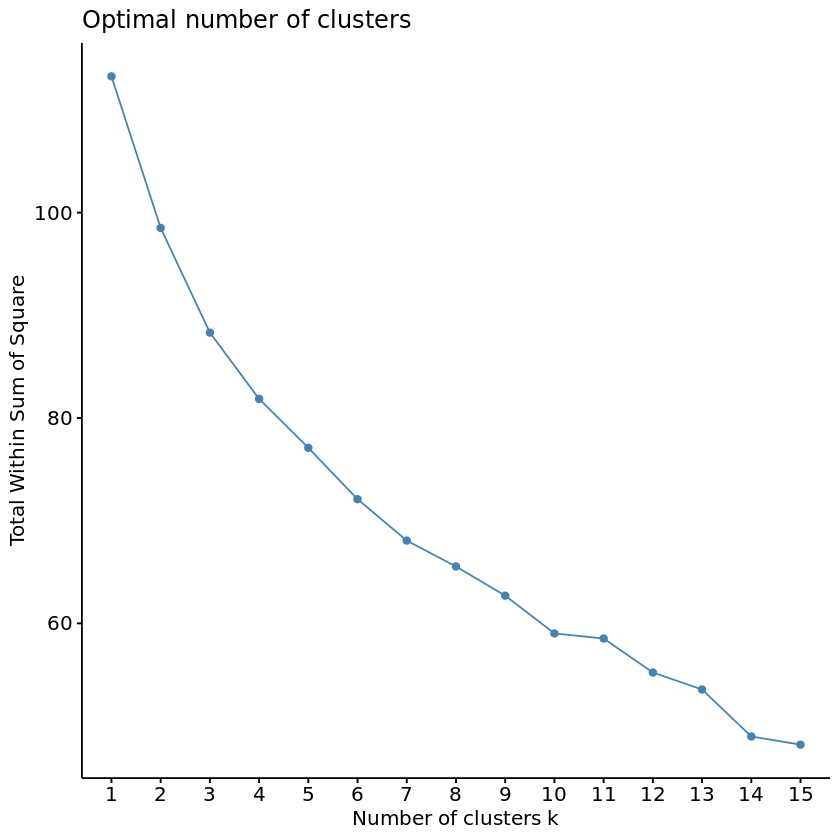

In [92]:
# Eblow Method based on WSS
set.seed(54321)
fviz_nbclust(ts_feat_list_df_scaled, 
             kmeans, 
             method = "wss", 
             k.max=15, 
             iter.max=1000, 
             nstart=100, 
             algorithm="Lloyd")
# No clear best number

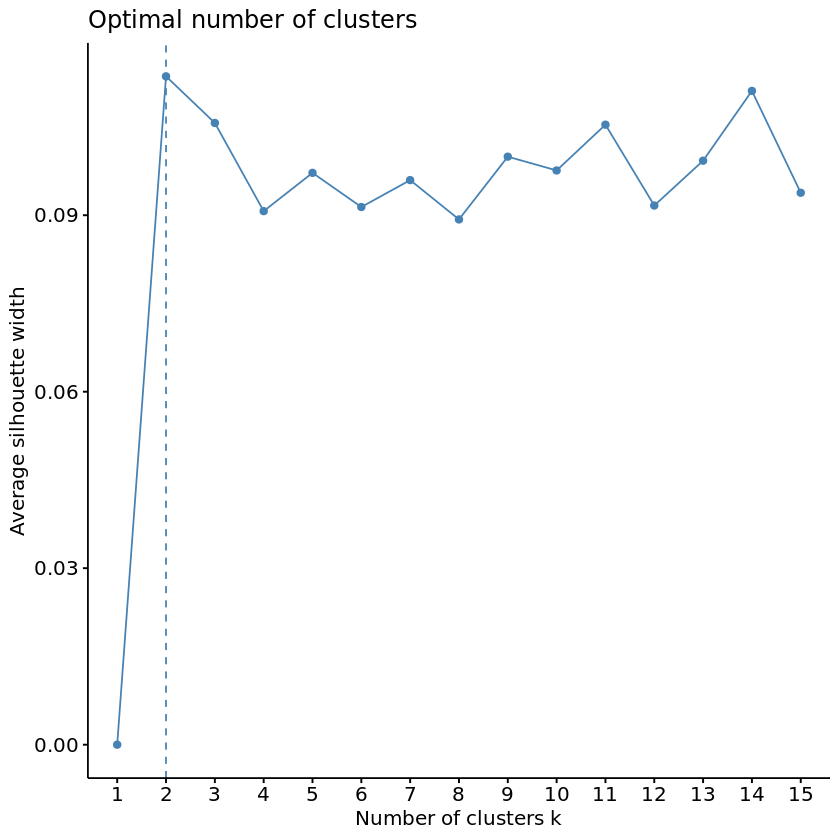

In [93]:
# Let's try the silhouette method instead
set.seed(54321)
fviz_nbclust(ts_feat_list_df_scaled,  
             kmeans, 
             method="silhouette", 
             k.max=15, 
             iter.max=10000, 
             nstart=500, 
             algorithm="Lloyd")
# Much clearer indication of 2 being optimal, with 6 another potential option

In [94]:
k1 <- 2
k2 <- 6

set.seed(54321)
kmeans_clust1 <- kmeans(ts_feat_list_df_scaled, 
                        k1, iter.max=10000, nstart=500, algorithm="Lloyd") 
set.seed(54321)
kmeans_clust2 <- kmeans(ts_feat_list_df_scaled, 
                        k2, iter.max=10000, nstart=500, algorithm="Lloyd") 

In [95]:
D <- daisy(ts_feat_list_df_scaled)

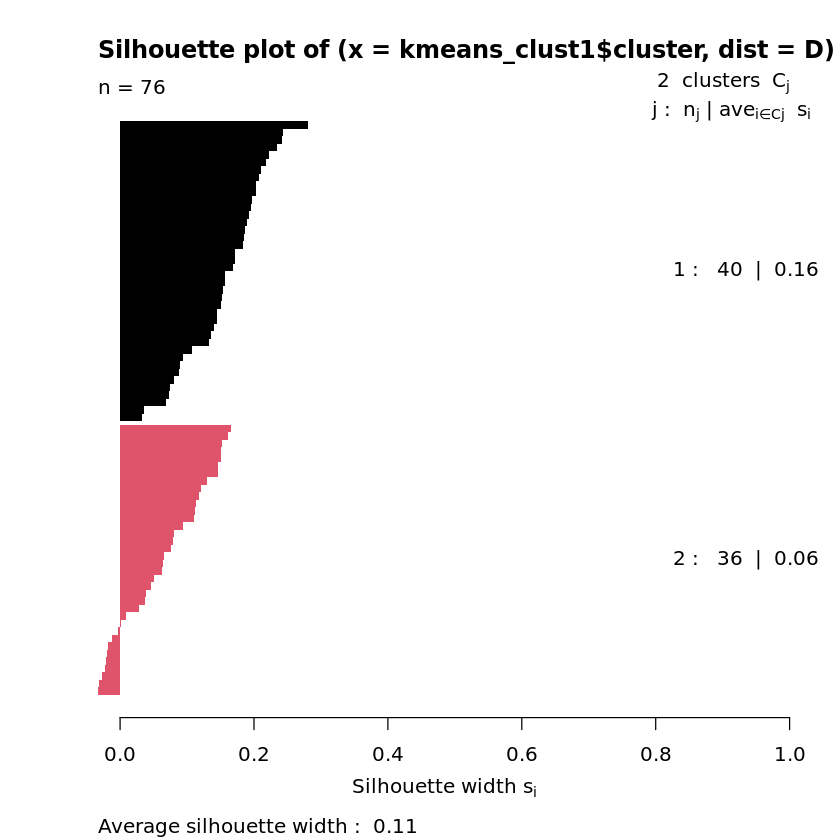

In [96]:
plot(silhouette(kmeans_clust1$cluster, D), col=1:k1, border=NA)

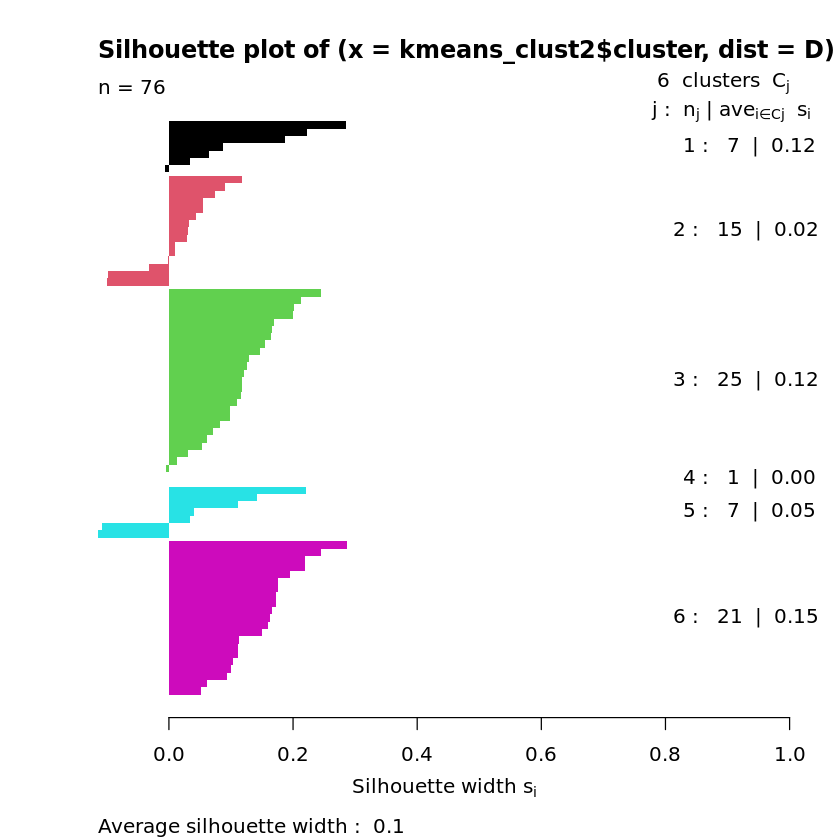

In [97]:
plot(silhouette(kmeans_clust2$cluster, D), col=1:k2, border=NA)

In [98]:
set.seed(54321)
kfinal <- 2
kmeans_final <- kmeans(ts_feat_list_df_scaled,
                       kfinal, iter.max=10000, nstart=500, algorithm="Lloyd") 

In [99]:
saveRDS(kmeans_final, file="kmeans_tsfeat_mean_var.RData")

In [100]:
kmeans_final$cluster

[1] 1 1 1 1 1 1 2 2 1 2 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
[39] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 2 1 1 2 2 1 1 2 1 2 1 2 2 2

In [101]:
kmeans_clust_df <- data.frame(ts_index=1:length(kmeans_final$cluster), 
                              kmeans_catch22_clust_assign=kmeans_final$cluster)

In [102]:
head(kmeans_clust_df)

,ts_index,kmeans_catch22_clust_assign
,<int>,<int>
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1


In [103]:
write.csv(kmeans_clust_df, "kmeans_tsfeat_mean_var_clustering_assign.csv", row.names=FALSE)

## K-Means with TS Features Excluding Mean and Variance

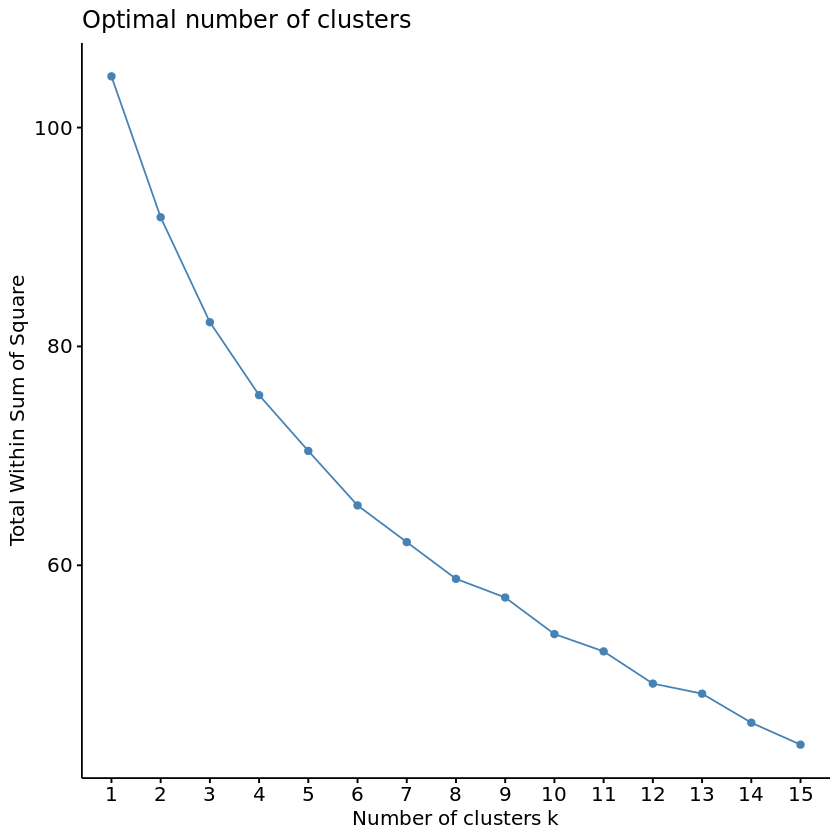

In [104]:
# Eblow Method based on WSS
set.seed(54321)
fviz_nbclust(ts_feat_list_df_scaled %>% select(-c(mean, var)), 
             kmeans, 
             method = "wss", 
             k.max=15, 
             iter.max=1000, 
             nstart=100, 
             algorithm="Lloyd")
# No clear best number

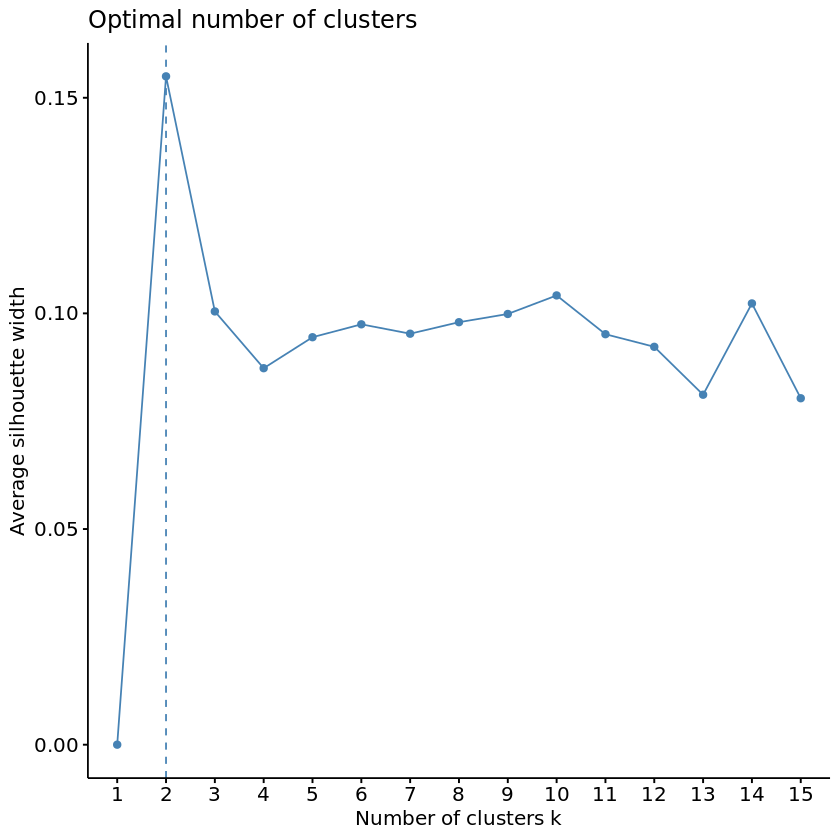

In [105]:
# Let's try the silhouette method instead
set.seed(54321)
fviz_nbclust(ts_feat_list_df_scaled %>% select(-c(mean, var)),  
             kmeans, 
             method="silhouette", 
             k.max=15, 
             iter.max=10000, 
             nstart=500, 
             algorithm="Lloyd")
# Much clearer indication of 2 being optimal, with 6 another potential option

In [106]:
k1 <- 2
k2 <- 3
k3 <- 7

set.seed(54321)
kmeans_clust1 <- kmeans(ts_feat_list_df_scaled %>% select(-c(mean, var)), 
                        k1, iter.max=10000, nstart=500, algorithm="Lloyd") 
set.seed(54321)
kmeans_clust2 <- kmeans(ts_feat_list_df_scaled %>% select(-c(mean, var)), 
                        k2, iter.max=10000, nstart=500, algorithm="Lloyd") 
set.seed(54321)
kmeans_clust3 <- kmeans(ts_feat_list_df_scaled %>% select(-c(mean, var)), 
                        k3, iter.max=10000, nstart=500, algorithm="Lloyd") 

In [107]:
D <- daisy(ts_feat_list_df_scaled)

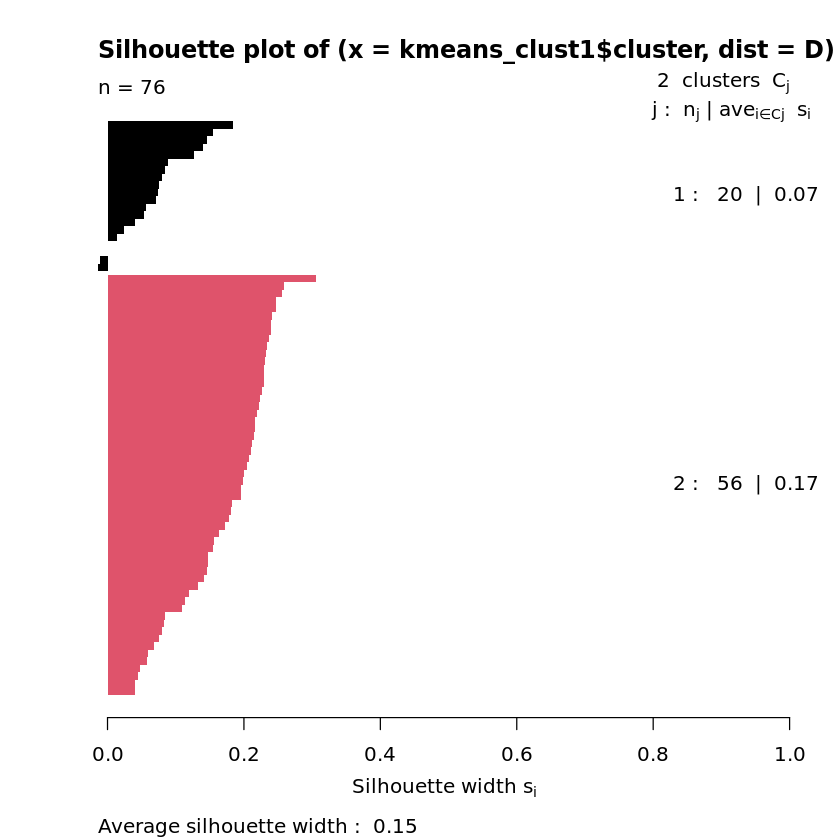

In [108]:
plot(silhouette(kmeans_clust1$cluster, D), col=1:k1, border=NA)

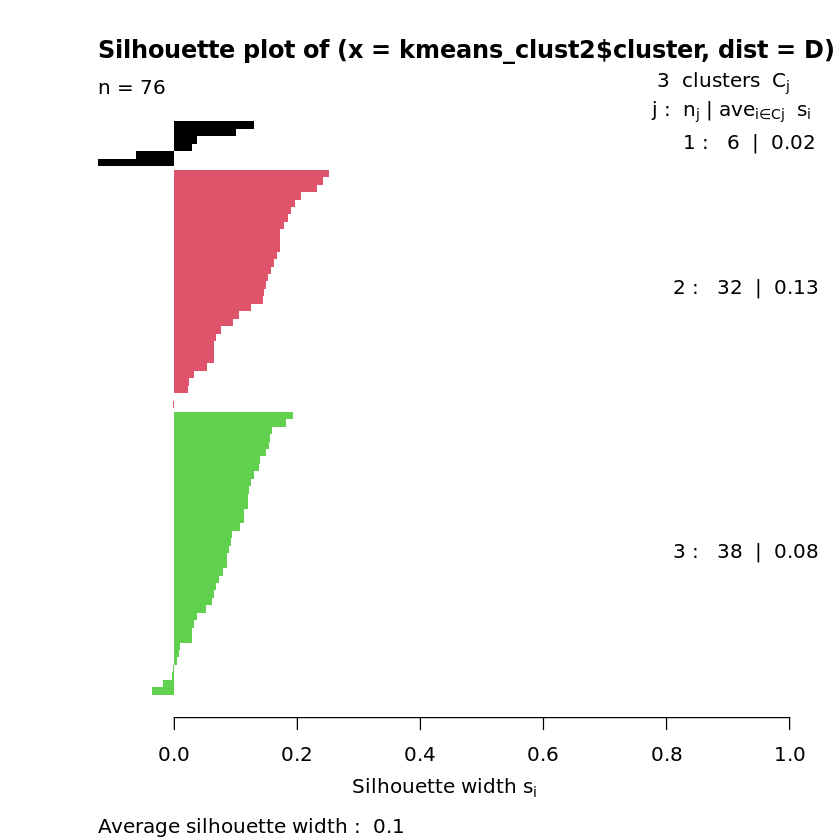

In [109]:
plot(silhouette(kmeans_clust2$cluster, D), col=1:k2, border=NA)

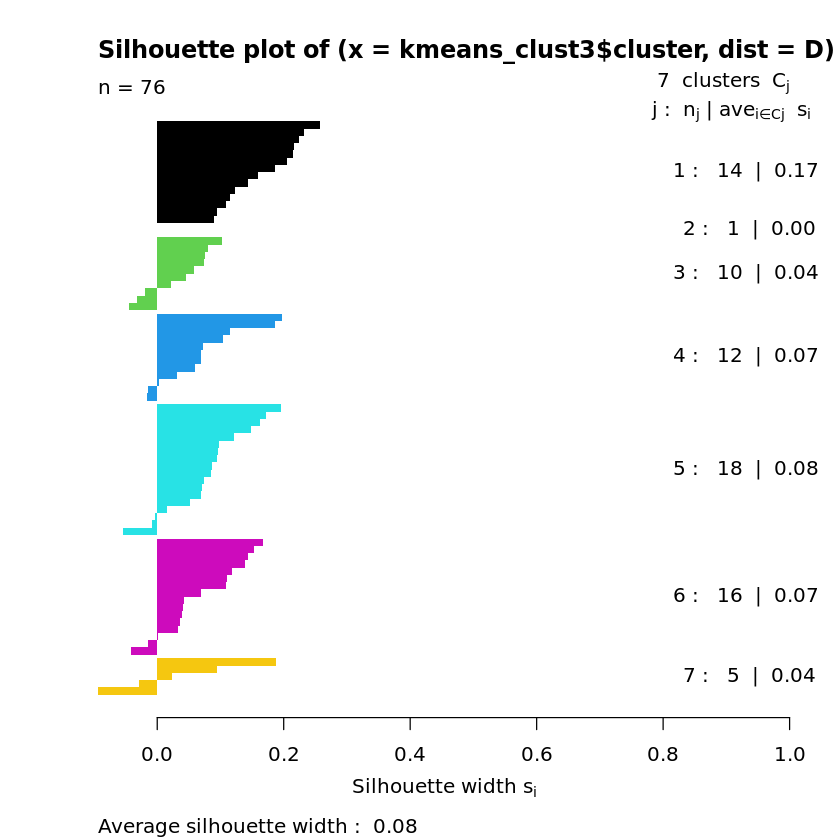

In [110]:
plot(silhouette(kmeans_clust3$cluster, D), col=1:k3, border=NA)

In [111]:
set.seed(54321)
kfinal <- 2
kmeans_final <- kmeans(ts_feat_list_df_scaled %>% select(-c(mean, var)),
                       kfinal, iter.max=10000, nstart=500, algorithm="Lloyd") 

In [112]:
saveRDS(kmeans_final, file="kmeans_tsfeat.RData")

In [113]:
kmeans_final$cluster

[1] 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 2 2 2 1 1 2 2 1 1 2 2 2 2 2 2 2 2 2

In [114]:
kmeans_clust_df <- data.frame(ts_index=1:length(kmeans_final$cluster), 
                              kmeans_catch22_clust_assign=kmeans_final$cluster)

In [115]:
head(kmeans_clust_df)

,ts_index,kmeans_catch22_clust_assign
,<int>,<int>
1,1,2
2,2,2
3,3,2
4,4,2
5,5,2
6,6,2


In [116]:
write.csv(kmeans_clust_df, "kmeans_tsfeat_clustering_assign.csv", row.names=FALSE)

Mean and variance don't seem to impact clustering results here, but they did with Catch22

## GMM Clustering with Mean and Variance

In [117]:
gmm_clust <- Mclust(ts_feat_list_df_scaled, G=1:12)

In [118]:
summary(gmm_clust)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEE (ellipsoidal, equal volume, shape and orientation) model with 8
components: 

 log-likelihood  n  df      BIC      ICL
       3147.002 76 751 3041.622 3041.622

Clustering table:
 1  2  3  4  5  6  7  8 
69  1  1  1  1  1  1  1 

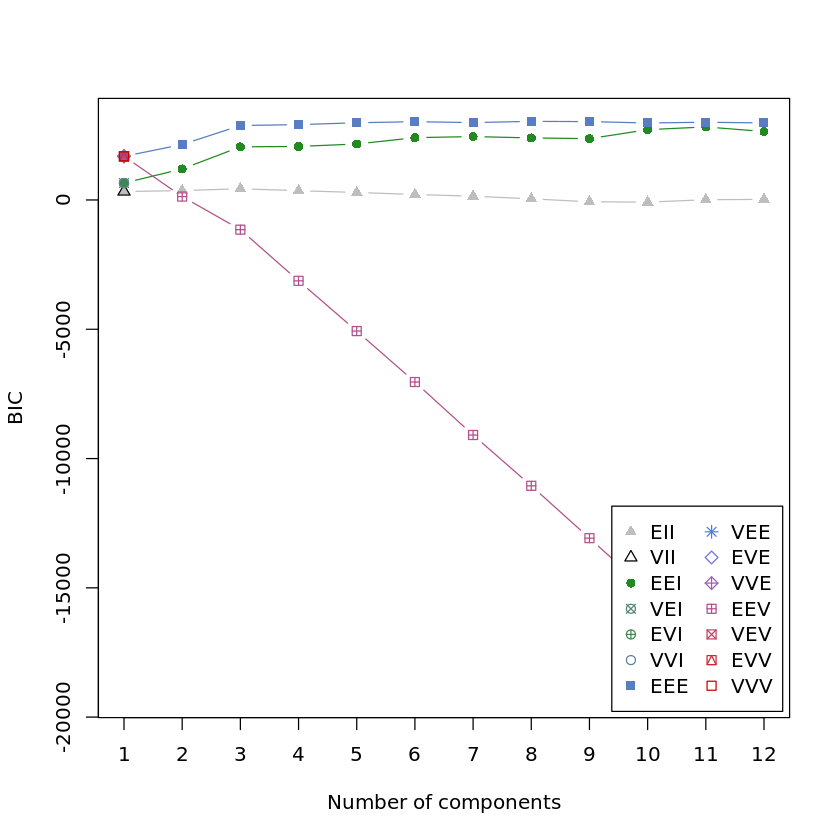

In [119]:
plot(gmm_clust, what = c("BIC"))

In [120]:
gmm_clust$modelName

[1] "EEE"

In [121]:
gmm_clust$G

[1] 8

In [122]:
gmm_clust$classification

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 1 1 1 1 1 1 1 1 4 5 1 1 6 1 7 8 1 1 1 1 1 1 1

In [123]:
gmm_clust$uncertainty

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [124]:
saveRDS(gmm_clust, file="gmm_tsfeat_mean_var.RData")

In [125]:
gmm_clust_df <- data.frame(ts_index=1:length(gmm_clust$classification), 
                           gmm_catch22_clust_assign=gmm_clust$classification,
                           uncertainty=gmm_clust$uncertainty
                          )

In [126]:
head(gmm_clust_df)

,ts_index,gmm_catch22_clust_assign,uncertainty
,<int>,<dbl>,<dbl>
1,1,1,0
2,2,1,0
3,3,1,0
4,4,1,0
5,5,1,0
6,6,1,0


In [127]:
write.csv(gmm_clust_df, "gmm_tsfeat_mean_var_clustering_assign.csv", row.names=FALSE)

## GMM Clust without Mean and Variance

In [128]:
gmm_clust <- Mclust(ts_feat_list_df_scaled %>% select(-c(mean, var)), G=1:12)

In [129]:
summary(gmm_clust)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEE (ellipsoidal, equal volume, shape and orientation) model with 7
components: 

 log-likelihood  n  df      BIC      ICL
       2882.618 76 644 2976.243 2976.243

Clustering table:
 1  2  3  4  5  6  7 
70  1  1  1  1  1  1 

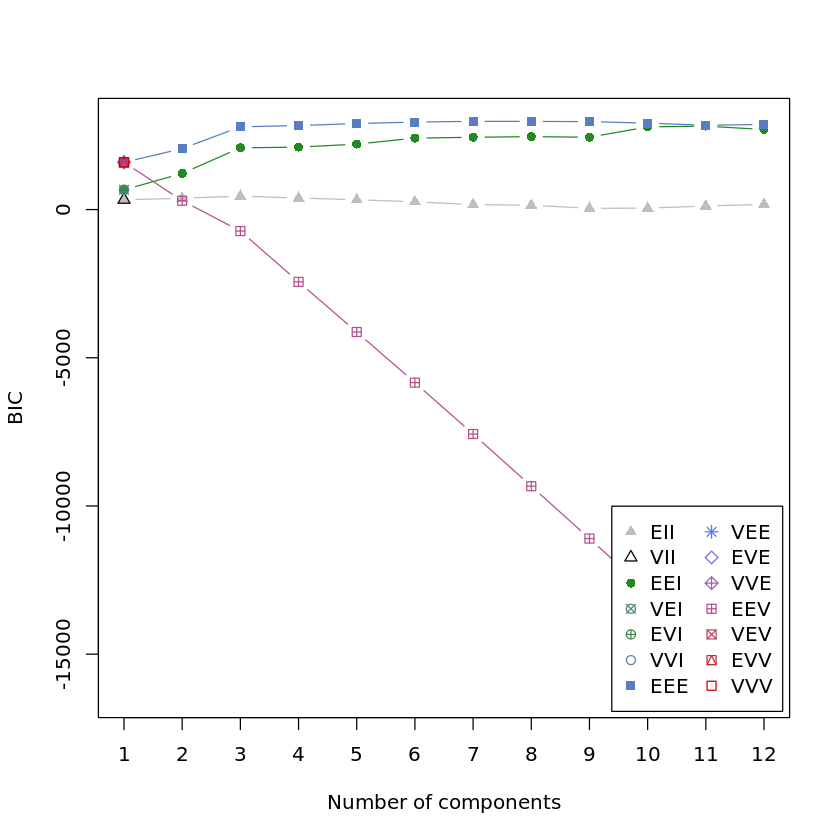

In [130]:
plot(gmm_clust, what = c("BIC"))

In [131]:
gmm_clust$modelName

[1] "EEE"

In [132]:
gmm_clust$G

[1] 7

In [133]:
gmm_clust$classification

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 1 1 1 1 1 1 1 1 4 5 1 1 6 1 7 1 1 1 1 1 1 1 1

In [134]:
gmm_clust$uncertainty

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [135]:
saveRDS(gmm_clust, file="gmm_tsfeat.RData")

In [136]:
gmm_clust_df <- data.frame(ts_index=1:length(gmm_clust$classification), 
                           gmm_catch22_clust_assign=gmm_clust$classification,
                           uncertainty=gmm_clust$uncertainty
                          )

In [137]:
head(gmm_clust_df)

,ts_index,gmm_catch22_clust_assign,uncertainty
,<int>,<dbl>,<dbl>
1,1,1,0
2,2,1,0
3,3,1,0
4,4,1,0
5,5,1,0
6,6,1,0


In [138]:
write.csv(gmm_clust_df, "gmm_tsfeat_clustering_assign.csv", row.names=FALSE)

# K-Medoids Clustering on Raw Time Series

## Clusters without Normalizing Data

In [139]:
dtw_clusters <- tsclust(train_samples_ts, 
                        k=2:12, 
                        type="partitional", 
                        distance = "dtw_basic", 
                        centroid = "pam",
                        seed=54321,
                        trace=TRUE
                       )


	Precomputing distance matrix...



Repetition 1 for k = 2



Iteration 1: Changes / Distsum = 76 / 50165888
Iteration 2: Changes / Distsum = 13 / 28649136
Iteration 3: Changes / Distsum = 5 / 27246448
Iteration 4: Changes / Distsum = 6 / 26470328
Iteration 5: Changes / Distsum = 11 / 25018251
Iteration 6: Changes / Distsum = 5 / 21254810
Iteration 7: Changes / Distsum = 0 / 21254810



Repetition 1 for k = 3



Iteration 1: Changes / Distsum = 76 / 23250550
Iteration 2: Changes / Distsum = 5 / 18803600
Iteration 3: Changes / Distsum = 0 / 18803600



Repetition 1 for k = 4



Iteration 1: Changes / Distsum = 76 / 26811032
Iteration 2: Changes / Distsum = 20 / 17464293
Iteration 3: Changes / Distsum = 3 / 16770916
Iteration 4: Changes / Distsum = 2 / 16745902
Iteration 5: Changes / Distsum = 1 / 16728500
Iteration 6: Changes / Distsum = 0 / 16728500



Repetition 1 for k = 5



Iteration 1: Changes / Distsum = 76 / 25647411
Iteration 2: Changes / Distsum = 10 / 16531080
Iteration 3: Changes / Distsum = 1 / 16398648
Iteration 4: Changes / Distsum = 0 / 16398648



Repetition 1 for k = 6



Iteration 1: Changes / Distsum = 76 / 19713756
Iteration 2: Changes / Distsum = 9 / 17175426
Iteration 3: Changes / Distsum = 15 / 14968766
Iteration 4: Changes / Distsum = 7 / 14225910
Iteration 5: Changes / Distsum = 3 / 14071036
Iteration 6: Changes / Distsum = 0 / 14063040



Repetition 1 for k = 7



Iteration 1: Changes / Distsum = 76 / 18495500
Iteration 2: Changes / Distsum = 4 / 15454396
Iteration 3: Changes / Distsum = 3 / 15293227
Iteration 4: Changes / Distsum = 0 / 15285232



Repetition 1 for k = 8



Iteration 1: Changes / Distsum = 76 / 18826626
Iteration 2: Changes / Distsum = 17 / 15138691
Iteration 3: Changes / Distsum = 8 / 14866632
Iteration 4: Changes / Distsum = 7 / 13665594
Iteration 5: Changes / Distsum = 3 / 13480624
Iteration 6: Changes / Distsum = 1 / 13463222
Iteration 7: Changes / Distsum = 0 / 13463222



Repetition 1 for k = 9



Iteration 1: Changes / Distsum = 76 / 16228758
Iteration 2: Changes / Distsum = 7 / 15023328
Iteration 3: Changes / Distsum = 3 / 14908188
Iteration 4: Changes / Distsum = 0 / 14904427



Repetition 1 for k = 10



Iteration 1: Changes / Distsum = 76 / 16407916
Iteration 2: Changes / Distsum = 9 / 13655431
Iteration 3: Changes / Distsum = 3 / 13405304
Iteration 4: Changes / Distsum = 5 / 13231460
Iteration 5: Changes / Distsum = 3 / 13099606
Iteration 6: Changes / Distsum = 2 / 13074592
Iteration 7: Changes / Distsum = 1 / 13057190
Iteration 8: Changes / Distsum = 0 / 13057190



Repetition 1 for k = 11



Iteration 1: Changes / Distsum = 76 / 24343044
Iteration 2: Changes / Distsum = 15 / 16027480
Iteration 3: Changes / Distsum = 5 / 15159280
Iteration 4: Changes / Distsum = 4 / 15062327
Iteration 5: Changes / Distsum = 2 / 14924854
Iteration 6: Changes / Distsum = 0 / 14924854



Repetition 1 for k = 12



Iteration 1: Changes / Distsum = 76 / 13055416
Iteration 2: Changes / Distsum = 6 / 12268712
Iteration 3: Changes / Distsum = 0 / 12268712

	Elapsed time is 127.341 seconds.



In [140]:
dtw_cluster_quality <- lapply(dtw_clusters, cvi)

In [141]:
dtw_cluster_quality_df <- data.frame(do.call("rbind", dtw_cluster_quality))

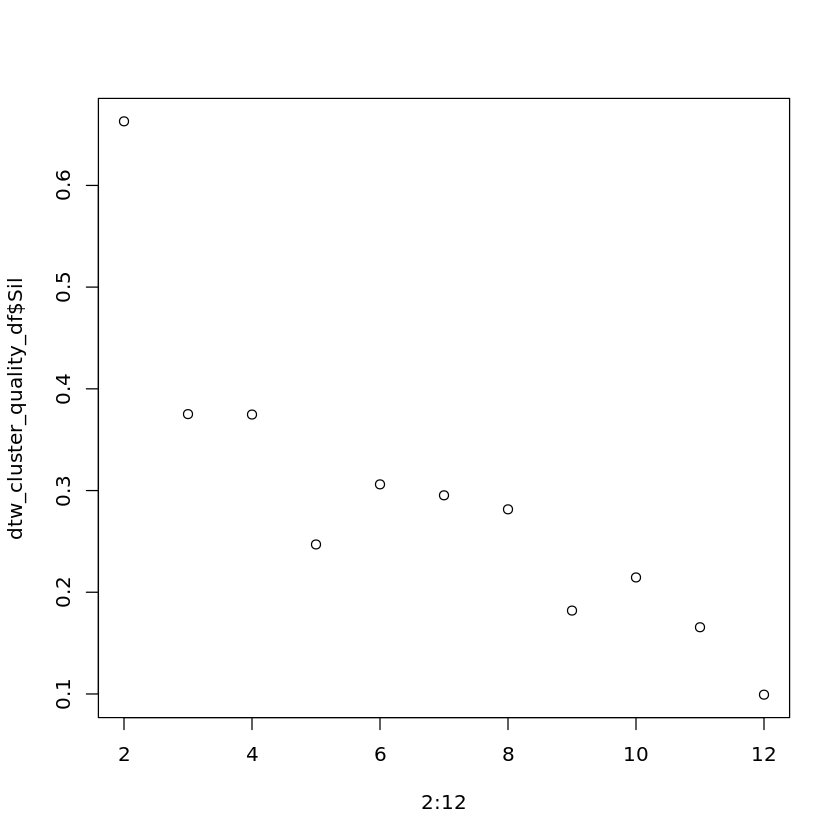

In [142]:
plot(2:12, dtw_cluster_quality_df$Sil)

In [143]:
final_dtw_clust <- tsclust(train_samples_ts,
                           k=2, 
                           type="partitional", 
                           distance = "dtw_basic", 
                           centroid = "pam",
                           seed=54321,
                           trace=TRUE
                       )


	Precomputing distance matrix...

Iteration 1: Changes / Distsum = 76 / 50165888
Iteration 2: Changes / Distsum = 13 / 28649136
Iteration 3: Changes / Distsum = 5 / 27246448
Iteration 4: Changes / Distsum = 6 / 26470328
Iteration 5: Changes / Distsum = 11 / 25018251
Iteration 6: Changes / Distsum = 5 / 21254810
Iteration 7: Changes / Distsum = 0 / 21254810

	Elapsed time is 124.895 seconds.



In [144]:
final_dtw_clust

partitional clustering with 2 clusters
Using dtw_basic distance
Using pam centroids

Time required for analysis:
    user   system  elapsed 
1972.247    0.145  124.895 

Cluster sizes with average intra-cluster distance:

  size  av_dist
1   25 444242.1
2   51 198995.3

In [145]:
saveRDS(final_dtw_clust, file="dtw_clust.RData")

In [146]:
dtw_clust_assign <- final_dtw_clust@cluster

In [147]:
dtw_clust_df <- data.frame(ts_index=1:length(dtw_clust_assign), 
                           dtw_clust_assign=dtw_clust_assign
                          )

In [148]:
head(dtw_clust_df)

,ts_index,dtw_clust_assign
,<int>,<int>
1,1,2
2,2,2
3,3,2
4,4,1
5,5,1
6,6,1


In [149]:
write.csv(dtw_clust_df, "dtw_clustering_assign.csv", row.names=FALSE)

## Clusters After Normalizing Data

In [150]:
train_samples_ts_norm <- lapply(train_samples_ts, function(x) (x-mean(x))/sd(x))

In [151]:
dtw_clusters_norm <- tsclust(train_samples_ts_norm, 
                             k = 2:12, 
                             type="partitional", 
                             distance = "dtw_basic", 
                             centroid = "pam",
                             seed=54321,
                             trace=TRUE
                            )


	Precomputing distance matrix...



Repetition 1 for k = 2



Iteration 1: Changes / Distsum = 76 / 99804.71
Iteration 2: Changes / Distsum = 0 / 82321.22



Repetition 1 for k = 3



Iteration 1: Changes / Distsum = 76 / 87914.33
Iteration 2: Changes / Distsum = 16 / 83022.21
Iteration 3: Changes / Distsum = 11 / 81413.31
Iteration 4: Changes / Distsum = 7 / 80924.59
Iteration 5: Changes / Distsum = 0 / 80251.27



Repetition 1 for k = 4



Iteration 1: Changes / Distsum = 76 / 82057.4
Iteration 2: Changes / Distsum = 19 / 77443.51
Iteration 3: Changes / Distsum = 0 / 77443.51



Repetition 1 for k = 5



Iteration 1: Changes / Distsum = 76 / 80995.48
Iteration 2: Changes / Distsum = 14 / 79725.49
Iteration 3: Changes / Distsum = 10 / 78890.29
Iteration 4: Changes / Distsum = 0 / 78890.29



Repetition 1 for k = 6



Iteration 1: Changes / Distsum = 76 / 83206.84
Iteration 2: Changes / Distsum = 28 / 74622.84
Iteration 3: Changes / Distsum = 0 / 74622.84



Repetition 1 for k = 7



Iteration 1: Changes / Distsum = 76 / 79273.22
Iteration 2: Changes / Distsum =   22 / 74133
Iteration 3: Changes / Distsum =    0 / 74133



Repetition 1 for k = 8



Iteration 1: Changes / Distsum = 76 / 75210.29
Iteration 2: Changes / Distsum = 21 / 71290.77
Iteration 3: Changes / Distsum =  5 / 70890.1
Iteration 4: Changes / Distsum = 0 / 70715.61



Repetition 1 for k = 9



Iteration 1: Changes / Distsum = 76 / 72292.08
Iteration 2: Changes / Distsum =  9 / 71747.6
Iteration 3: Changes / Distsum =  0 / 71747.6



Repetition 1 for k = 10



Iteration 1: Changes / Distsum = 76 / 71365.23
Iteration 2: Changes / Distsum = 11 / 70443.54
Iteration 3: Changes / Distsum = 7 / 69991.28
Iteration 4: Changes / Distsum = 16 / 69079.13
Iteration 5: Changes / Distsum = 0 / 69079.13



Repetition 1 for k = 11



Iteration 1: Changes / Distsum = 76 / 72099.62
Iteration 2: Changes / Distsum = 23 / 67393.39
Iteration 3: Changes / Distsum = 4 / 66868.04
Iteration 4: Changes / Distsum = 0 / 66868.04



Repetition 1 for k = 12



Iteration 1: Changes / Distsum = 76 / 70385.83
Iteration 2: Changes / Distsum = 9 / 67009.12
Iteration 3: Changes / Distsum =  0 / 66335.8

	Elapsed time is 128.495 seconds.



In [152]:
dtw_norm_cluster_quality <- lapply(dtw_clusters_norm, cvi)

In [153]:
dtw_norm_cluster_quality_df <- data.frame(do.call("rbind", dtw_norm_cluster_quality))

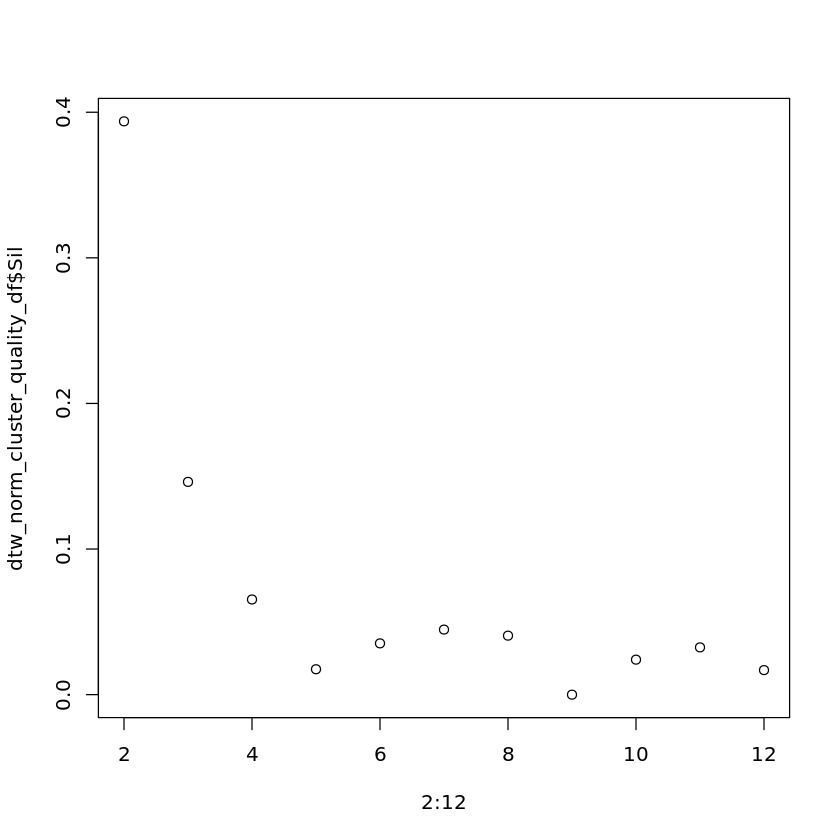

In [154]:
plot(2:12, dtw_norm_cluster_quality_df$Sil)

In [155]:
final_dtw_norm_clust <- tsclust(train_samples_ts_norm,
                                k=2, 
                                type="partitional", 
                                distance = "dtw_basic", 
                                centroid = "pam",
                                seed=54321,
                                trace=TRUE
                               )


	Precomputing distance matrix...

Iteration 1: Changes / Distsum = 76 / 99804.71
Iteration 2: Changes / Distsum = 0 / 82321.22

	Elapsed time is 125.823 seconds.



In [156]:
final_dtw_norm_clust

partitional clustering with 2 clusters
Using dtw_basic distance
Using pam centroids

Time required for analysis:
    user   system  elapsed 
1986.765    0.558  125.823 

Cluster sizes with average intra-cluster distance:

  size av_dist
1   70 1089.09
2    6 1014.15

In [157]:
saveRDS(final_dtw_norm_clust, file="dtw_norm_clust.RData")

In [158]:
dtw_norm_clust_assign <- final_dtw_norm_clust@cluster

In [159]:
dtw_norm_clust_df <- data.frame(ts_index=1:length(dtw_norm_clust_assign), 
                                dtw_clust_assign=dtw_norm_clust_assign
                               )

In [160]:
head(dtw_norm_clust_df)

,ts_index,dtw_clust_assign
,<int>,<int>
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1


In [161]:
write.csv(dtw_norm_clust_df, "dtw_norm_clustering_assign.csv", row.names=FALSE)